<h1><center>Mid Semester Exam</center></h1>
<h4><center>Spandan Anupam | 1711136</center></h4>

<h5><center>All OO code placed in ./LibPython/Library.py</center></h5>

In [1]:
from LibPython.Library import MatInv
import numpy as np

## Q6: Inversion (Jacobi and Gauss Siedel)

In [2]:
A = [[-2, 0, 0, -1, 0, 0.5],
[ 0, 4, 0.5, 0, 1, 0],
[ 0, 0.5, 1.5, 0, 0, 0],
[-1, 0, 0, -2, 0, 1],
[ 0, 1, 0, 0, -2.5, 0],
[ 0.5, 0, 0, 1, 0, -3.75]]

b = [-1, 0, 2.75, 2.5, -3, 2]

A = np.array(A)
b = np.array(b)

In [3]:
m = MatInv()
precision = 1e-5
JB = m.jacobi(A, b, precision**2)
GS = m.gauss_siedel(A, b, precision**2)

print(f"The Jacobi Solution: {JB}")
print(f"The Gauss Siedel Solution: {GS}")

The Jacobi Solution: [ 1.5 -0.5  2.  -2.5  1.  -1. ]
The Gauss Siedel Solution: [ 1.5 -0.5  2.  -2.5  1.  -1. ]


## Q4: Radioactive Decay

In [4]:
from LibPython.Library import Statistics
import numpy as np
s = Statistics()

data = np.genfromtxt("msfit.txt")
time = data[:, 0]
N = data[:, 1]
sig = data[:, 2]

N = np.log(N)
sig = 1 / sig

In [5]:
Nfit, m, c, sig2m, sig2c, cov, r2 = s.linear_regression(time, N, sig, errfull=True)

In [6]:
halflife = np.log(2) / (-m)
error = np.sqrt(sig2m)

print(f"The estimate for half life is {halflife} with an error of {error}")

The estimate for half life is 74.8766130697403 with an error of 0.0010146470187917449


In [7]:
chisq, chisqn = s.chisq(N, Nfit, sig)
print(f"The chisq value of {chisq} is greater than the critical value of 3.325, so we reject the null hypothesis")

The chisq value of 15.17084059456294 is greater than the critical value of 3.325, so we reject the null hypothesis


In [8]:
import matplotlib.pyplot as plt

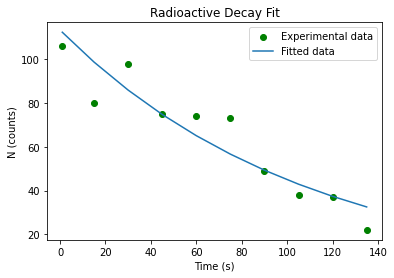

In [9]:
plt.scatter(time, np.exp(N), c="green", label="Experimental data")
plt.plot(time, np.exp(Nfit), label="Fitted data")
plt.xlabel("Time (s)")
plt.ylabel("N (counts)")
plt.legend()
plt.title("Radioactive Decay Fit")
plt.savefig("msfit.png")

## Q5 Power Iteration

In [1]:
from LibPython.Library import Eigen
import numpy as np
e = Eigen()

In [2]:
A = [[2, -1,  0,  0,  0],
[-1,  2, -1,  0,  0],
[0, -1,  2, -1,  0],
[0,  0, -1,  2, -1],
[0,  0,  0, -1,  2]]
A = np.array(A)

In [3]:
e.power(A)

([3.7309352420415047,
  1.9998605207942068,
  0.26794916345524206,
  0.0004948405546917366,
  0.0002148713482187682],
 [array([ 0.28872856, -0.5       ,  0.57729684, -0.5       ,  0.28872856]),
  array([ 5.77301231e-01,  8.78130241e-05, -5.77448319e-01,  8.78130241e-05,
          5.77301231e-01]),
  array([0.28866267, 0.5       , 0.57736274, 0.5       , 0.28866267]),
  array([ 0.32190279, -0.49914609,  0.54264389, -0.49914679,  0.3219035 ]),
  array([ 0.38341842, -0.49496809,  0.4724137 , -0.49087538,  0.3792935 ])])

In [6]:
a = -1
c = -1
b = 2
n = 5
lmbd = []
veclist = []
for k in range(2):
    v = np.zeros(n)
    l = b + 2*np.sqrt(a*c)*np.cos((k+1)*np.pi/(n+1))
    for i in range(n):
        v[i] = 2*np.sqrt(c/a)**(k+1)*np.sin((i+1)*(k+1)*np.pi/(n+1))
    lmbd.append(l)
    veclist.append(v / np.linalg.norm(v))
veclist
# print("The predicted values do not match, there seems to be an error in the sign in the eigenvectors. Eigenvalues however, do match.")

[array([0.28867513, 0.5       , 0.57735027, 0.5       , 0.28867513]),
 array([ 5.00000000e-01,  5.00000000e-01,  7.07050159e-17, -5.00000000e-01,
        -5.00000000e-01])]